In [14]:
import collections
import json

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import average_precision_score, classification_report
from vidat import Vidat

In [15]:
annotation_pathname = "D:\\dataset\\ikea_action_dataset_video\\yicong\\annotations.json"
result_pathname = "i3d\\log\\overlap_clips\\demo16_s_fs1\\results\\action_segments.json"
frames_path = "D:\\dataset\\ikea_action_dataset_frame_small\\yicong"

# Get labels
vidat = Vidat(annotation_pathname, None)

action_list = [action["name"] for action in vidat.config.action_label]

video = vidat.annotation.video
fps = video.fps
frames = video.frames
actions = vidat.annotation.actions

gt_labels = np.zeros(frames, dtype=np.int)
for action in actions:
    no = action_list.index(action.action["name"])
    start = int(action.start * fps)
    end = int(action.end * fps)
    for i in range(start, end):
        gt_labels[i] = no

with open(result_pathname, "r", encoding="utf8") as f:
    result = json.load(f)["results"][frames_path]

predict_labels = np.zeros(frames, dtype=np.int)
for segment in result:
    label = segment["label"]
    start_frame, end_frame = segment["segment"]
    for i in range(start_frame, end_frame + 1):
        predict_labels[i] = action_list.index(label)

# Remove reverse
gt_labels[gt_labels == 7] = 2
# predict_labels[predict_labels == 7] = 2
gt_labels[gt_labels == 8] = 3
# predict_labels[predict_labels == 8] = 3

print(collections.Counter(gt_labels), len(gt_labels))
print(collections.Counter(predict_labels), len(predict_labels))

action_list = list(filter(lambda x: " - rev" not in x, action_list))

print("Action List:\n", action_list)

# for clazz in class_list:
#     tp = np.sum(np.logical_and(predict_labels == clazz, gt_labels == clazz))
#     tn = np.sum(np.logical_and(predict_labels != clazz, gt_labels != clazz))
#     fp = np.sum(np.logical_and(predict_labels == clazz, gt_labels != clazz))
#     fn = np.sum(np.logical_and(predict_labels != clazz, gt_labels == clazz))
#     total = tp + tn + fp + fn
#     recall = tp / (tp + fn)
#     precision = tp / (tp + fp)
#     accuracy = tp / total
#     print("-" * 50)
#     print(f"class: {action_list[clazz]}\nAccuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}")
#     print("-" * 50)

Counter({0: 8587, 2: 1511, 3: 1481, 4: 1326, 6: 1261, 5: 1098, 9: 486, 1: 319}) 16069
Counter({0: 4917, 3: 2992, 6: 2896, 4: 1936, 2: 1408, 9: 1264, 5: 592, 1: 64}) 16069
Action List:
 ['default', 'reach', 'flip table top', 'flip table', 'spin leg', 'align the leg', 'rotate table top', 'human grasp']


In [16]:
print(classification_report(gt_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.82      0.47      0.60      8587
           1       0.23      0.05      0.08       319
           2       0.69      0.64      0.67      1511
           3       0.42      0.85      0.57      1481
           4       0.55      0.80      0.65      1326
           5       0.82      0.44      0.58      1098
           6       0.42      0.96      0.58      1261
           9       0.11      0.28      0.16       486

    accuracy                           0.57     16069
   macro avg       0.51      0.56      0.48     16069
weighted avg       0.69      0.57      0.58     16069



AP: [0.670436010920876, 0.029939182363245026, 0.4784791295286898, 0.3745727259219302, 0.45119167932183857, 0.4028899268432049, 0.404693954761747, 0.05227211406685239]


Text(0, 0.5, 'AP')

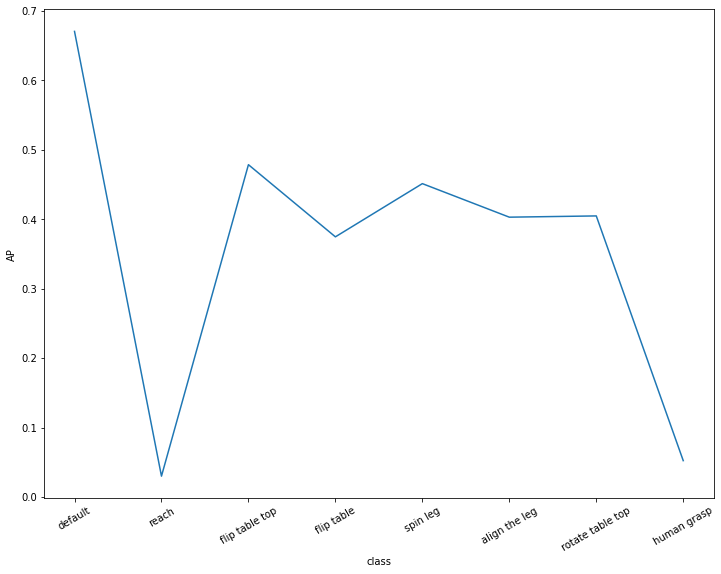

In [17]:
ap_list = []
class_list = np.unique(gt_labels)
for clazz in class_list:
    y_true = gt_labels == clazz
    y_score = predict_labels == clazz
    ap_list.append(average_precision_score(y_true, y_score))
print("AP:", ap_list)
plt.figure(figsize=(12, 9))
plt.plot(ap_list)
plt.xticks(range(len(action_list)), action_list, rotation=30)
plt.xlabel("class")
plt.ylabel("AP")

In [18]:
print("mAP:", np.mean(ap_list))

mAP: 0.358059340466048


In [11]:
# Get labels

def get_avg_duration(annotation_pathname):
    vidat = Vidat(annotation_pathname, None)

    action_list = [action["name"] for action in vidat.config.action_label]

    actions = vidat.annotation.actions

    duration_list = []
    for action in actions:
        if action.action["name"] == "reach":
            duration_list.append(action.end - action.start)
    return sum(duration_list) / len(duration_list)

video_list = [
        "haodong",
        "jack",
        "liyuan",
        "reaching",
        "yicong",
        "zheyu",
    ]
avg_list = []
for video in video_list:
    annotation_pathname = f"D:\\dataset\\ikea_action_dataset_video\\{video}\\annotations.json"
    avg = get_avg_duration(annotation_pathname)
    print(avg)
    avg_list.append(avg)
np.mean(avg_list)

0.5359259259259214
0.6460476190476153
0.6690714285714324
0.4409999999999977
0.5061904761904811
0.5601200000000045


0.559725908289242